<a href="https://colab.research.google.com/github/Serurays/Biomedical_Image_Analysis/blob/main/Biomedical_Image_Analysis_Part_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "heart_volume"

Archive:  heart_volume.zip
   creating: heart_volume/
  inflating: heart_volume/IMG0001.dcm  
  inflating: heart_volume/IMG0002.dcm  
  inflating: heart_volume/IMG0003.dcm  
  inflating: heart_volume/IMG0004.dcm  
  inflating: heart_volume/IMG0005.dcm  
  inflating: heart_volume/IMG0006.dcm  
  inflating: heart_volume/IMG0007.dcm  
  inflating: heart_volume/IMG0008.dcm  
  inflating: heart_volume/IMG0009.dcm  
  inflating: heart_volume/IMG0010.dcm  
  inflating: heart_volume/IMG0011.dcm  
  inflating: heart_volume/IMG0012.dcm  
  inflating: heart_volume/IMG0013.dcm  
  inflating: heart_volume/IMG0014.dcm  
  inflating: heart_volume/IMG0015.dcm  
  inflating: heart_volume/IMG0016.dcm  
  inflating: heart_volume/IMG0017.dcm  
  inflating: heart_volume/IMG0018.dcm  
  inflating: heart_volume/IMG0019.dcm  
  inflating: heart_volume/IMG0020.dcm  
  inflating: heart_volume/IMG0021.dcm  
  inflating: heart_volume/IMG0022.dcm  
  inflating: heart_volume/IMG0023.dcm  
  inflating: heart_volume/

In [ ]:
!unzip "heart_label"

Archive:  heart_label.zip
   creating: heart_label/
  inflating: heart_label/IMG0001.dcm  
  inflating: heart_label/IMG0002.dcm  
  inflating: heart_label/IMG0003.dcm  
  inflating: heart_label/IMG0004.dcm  
  inflating: heart_label/IMG0005.dcm  
  inflating: heart_label/IMG0006.dcm  
  inflating: heart_label/IMG0007.dcm  
  inflating: heart_label/IMG0008.dcm  
  inflating: heart_label/IMG0009.dcm  
  inflating: heart_label/IMG0010.dcm  
  inflating: heart_label/IMG0011.dcm  
  inflating: heart_label/IMG0012.dcm  
  inflating: heart_label/IMG0013.dcm  
  inflating: heart_label/IMG0014.dcm  
  inflating: heart_label/IMG0015.dcm  
  inflating: heart_label/IMG0016.dcm  
  inflating: heart_label/IMG0017.dcm  
  inflating: heart_label/IMG0018.dcm  
  inflating: heart_label/IMG0019.dcm  
  inflating: heart_label/IMG0020.dcm  
  inflating: heart_label/IMG0021.dcm  
  inflating: heart_label/IMG0022.dcm  
  inflating: heart_label/IMG0023.dcm  
  inflating: heart_label/IMG0024.dcm  
  inflating:

In [ ]:
import imageio.v2 as imageio
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import numpy as np

vol = imageio.volread("heart_volume", format="DICOM")
labels = imageio.volread("heart_label", format="DICOM")

Reading DICOM (examining files): 1/100 files (1.0%)100/100 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 100/100  (100.0%)
Reading DICOM (examining files): 1/100 files (1.0%)100/100 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 100/100  (100.0%)


In [ ]:
print("Volume Shape:", vol.shape)
print("Labels Shape:", labels.shape)

Volume Shape: (100, 320, 320)
Labels Shape: (100, 320, 320)


In [ ]:
print("All voxels:", ndi.mean(vol))
print("Left Atrium voxels:", ndi.mean(vol, labels, index=1))
print("All Other voxels:", ndi.mean(vol, labels, index=0))

All voxels: 160.07197021484376
Left Atrium voxels: 983.6255642145213
All Other voxels: 155.68331029290906


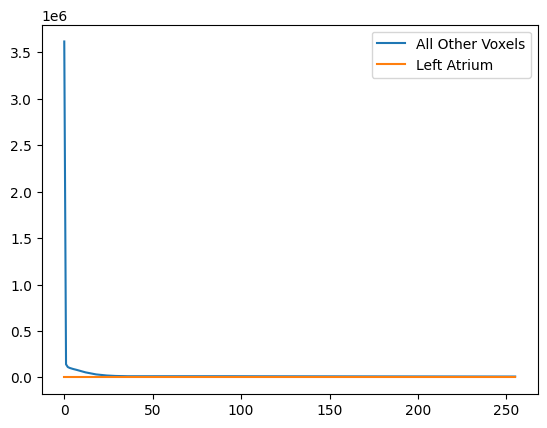

In [ ]:
left_atrium_hist = ndi.histogram(vol, 0, 255, 256, labels, index=[0, 1])

plt.plot(left_atrium_hist[0], label="All Other Voxels")
plt.plot(left_atrium_hist[1], label="Left Atrium")
plt.legend()
plt.show()

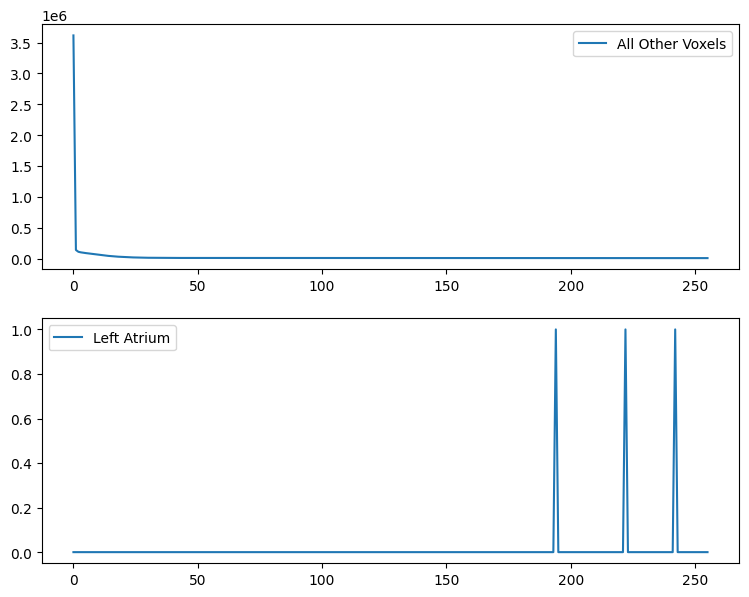

In [ ]:
left_atrium_hist = ndi.histogram(vol, 0, 255, 256, labels, index=[0, 1])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 7))

axes[0].plot(left_atrium_hist[0], label="All Other Voxels")
axes[1].plot(left_atrium_hist[1], label="Left Atrium")

axes[0].legend()
axes[1].legend()

plt.show()

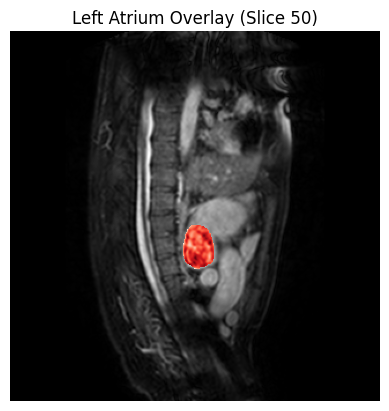

In [ ]:
left_atrium_mask = np.where(labels == 1, vol, np.nan)

plt.imshow(vol[50, :, :], cmap="gray")
plt.imshow(left_atrium_mask[50, :, :], cmap="Reds", alpha=1)
plt.title("Left Atrium Overlay (Slice 50)")
plt.axis("off")
plt.show()

In [ ]:
d0, d1, d2 = vol.meta["sampling"]
d0, d1, d2

(1.3699999999999999, 1.25, 1.25)

In [ ]:
dvoxels = d0 * d1 * d2
dvoxels

2.140625

In [ ]:
nvoxels = ndi.sum(1, labels, index=1)
nvoxels

54279

In [ ]:
volume = dvoxels * nvoxels
print("Volume of the Left Atrium (mm^3):", volume)

Volume of the Left Atrium (mm^3): 116190.984375


In [ ]:
com = ndi.center_of_mass(vol, labels, index=1)
print("Center of Mass (Left Atrium):", com)

Center of Mass (Left Atrium): (37.15691885621282, 186.3070936860112, 161.07860313422242)


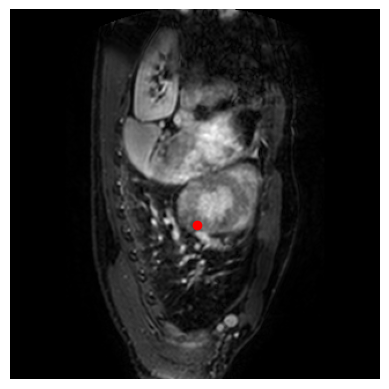

In [ ]:
plt.imshow(vol[5], cmap="gray")
plt.scatter(com[2], com[1], color="red")
plt.axis("off")
plt.show()

In [ ]:
mask = np.where(labels == 1, 1, 0)

d = ndi.distance_transform_edt(mask)

print(d.max())

14.560219778561036


In [ ]:
d = ndi.distance_transform_edt(mask, sampling=vol.meta["sampling"])

print(d.max())

18.33794972182005


Max distance (mm): 18.33794972182005
Max location: (29, 175, 162)


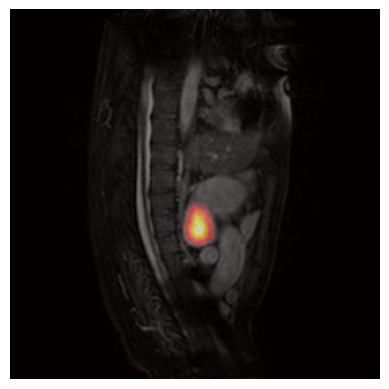

In [ ]:
left_atrium = labels == 1
dists = ndi.distance_transform_edt(left_atrium, sampling=vol.meta["sampling"])

print("Max distance (mm):", ndi.maximum(dists))
print("Max location:", ndi.maximum_position(dists))

plt.imshow(vol[50], cmap="gray")
plt.imshow(dists[50], cmap="hot", alpha=0.5)
plt.axis("off")
plt.show()

In [ ]:
d0, d1, d2, d3 = vol.meta["sampling"] # (30, 100, 320, 320)
dvoxel = d1 * d2 * d3
dvoxel

In [ ]:
ts = np.zeros(30)

for t in range(30):
  nvoxels = ndi.sum(1, labels[t], index=1)
  ts[t] = nvoxels * dvoxels

plt.plot(ts)
plt.show()

In [ ]:
tmax = np.argmax(ts)
tmin = np.argmin(ts)

fig, axes = plt.subplots(2, 1)

axes[0].imshow(vol[tmax, 4])
axes[1].imshow(vol[tmin, 4])

ej_vol = ts.max() - ts.min()
ej_frac = ej_vol / ts.max()

print("Estimated ejection volume (mm^3):", ej_vol)
print("Estimated ejection fraction:", ej_frac)